In [1]:
import numpy as np
import roboticstoolbox as rtb
import spatialmath as sm
import matplotlib.pyplot as plt

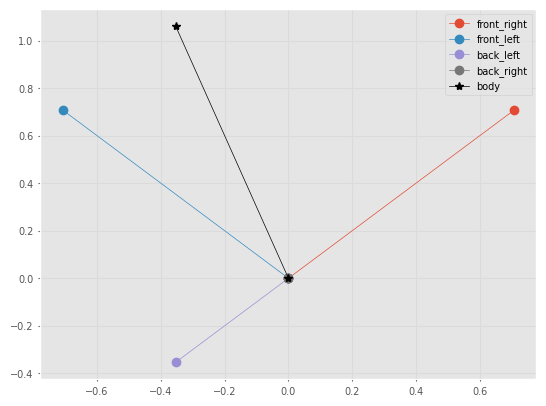

In [36]:
def length(x):
    return np.sqrt(np.sum(np.square(x)))

def norm(x):
    # return x
    if np.allclose(x, 0):
        return x
    return x / length(x)

def weights_to_wheels(weights):
    wheels = dict(
        front_right = np.array([1, 1]),
        front_left = np.array([-1, 1]),
        back_left = np.array([-1, -1]),
        back_right = np.array([1, -1])
    )
    
    return {label: weights[label] * norm(wheel) for label, wheel in wheels.items()}

def wheels_to_body(wheels):
    ret = np.zeros(2)
    for label, wheel in wheels.items():
        ret += wheel
    return ret

def weights_to_body(weights):
    wheels = weights_to_wheels(weights)
    body = wheels_to_body(wheels)
    return body

weights = {
    "front_right": 1,
    "front_left": 1,
    "back_left": 0.5,
    "back_right": 0
}
wheels = weights_to_wheels(weights)
body = wheels_to_body(wheels)

for label, wheel in wheels.items():
    plt.plot((0, wheel[0]), (0, wheel[1]), 'o-', label=label)

plt.plot((0, body[0]), (0, body[1]), 'k*-', label='body')

plt.legend()

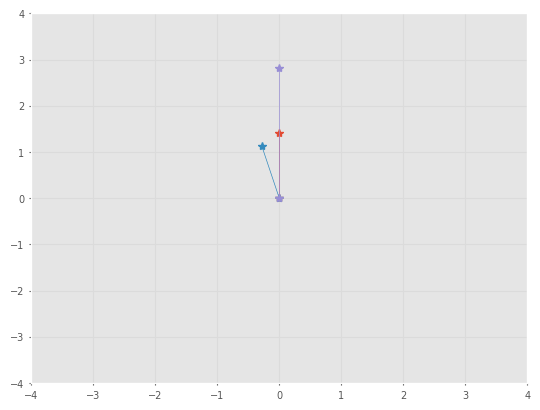

In [40]:
weights = [
    {
        "front_right": 1,
        "front_left": 1,
        "back_left": 0,
        "back_right": 0
    },
    {
        "front_right": 1,
        "front_left": 1,
        "back_left": 0.4,
        "back_right": 0
    },
        {
        "front_right": 1,
        "front_left": 1,
        "back_left": -1,
        "back_right": -1
    }
]

for w in weights:
    body = weights_to_body(w)
    plt.plot((0, body[0]), (0, body[1]), '-*')

s = 4
plt.xlim(-s, s)
plt.ylim(-s, s)
plt.show()

In [52]:
l1 = 1
l2 = 1
l = l1 + l2

def wheels_to_vws(r, w, l):
    return np.array([
        [1, 1, 1, 1],
        [1, -1, -1, 1],
        [1/l, 1/l, 1/l, 1/l]
    ]) @ w * (r/4)

wheels_to_vws(1, np.array([1, 1, 0, 0]), l)

array([0.5 , 0.  , 0.25])

In [92]:
def make_wheel_vs(vfr, vfl, vbr, vbl):
    return np.array([vfr, vfl, vbr, vbl])

def make_base_vs(vf, vs, w):
    return np.array([vf, vs, w])

def wheel2base(wheel_vs, r):
    vfr, vfl, vbr, vbl = wheel_vs
    vf = (vfr + vfl + vbr + vbl) / 4
    vs = (vbl + vfr - vfl - vbr) / 4
    w = (vbr + vfr - vfl - vbl) / (4 * 2 * r)
    return make_base_vs(vf, vs, w)

def base2wheel(base_vs, r):
    vf, vs, w = base_vs
    vfl = vf - vs - (2 * r * w)
    vbl = vf + vs - (2 * r * w)
    vbr = vf - vs + (2 * r * w)
    vfr = vf + vs + (2 * r * w)
    return make_wheel_vs(vfr, vfl, vbr, vbl)

w0 = make_wheel_vs(1, -1, -1, 1)
b = wheel2base(w0, r=5)
w1 = base2wheel(b, r=5)
if not np.allclose(w1, w0):
    print("error?", w0, w1)

In [74]:
#              vfr, vfl, vbr, vbl
movements = {
    "forward": [1, 1, 1, 1],
    "backward": [-1, -1, -1, -1],
    "right": [1, -1, -1, 1],
    "left": [-1, 1, 1, -1],
    "forward_right": [1, 0, 0, 1]
}

for name, movement in movements.items():
    print(name, forward(movement, r))

forward [1. 0. 0.]
backward [-1.  0.  0.]
right [0. 1. 0.]
left [ 0. -1.  0.]
forward_right [0.5 0.5 0. ]


In [ ]:
from dataclasses import dataclass

class Robot:
    x: float
    y: float
    theta: float
    r: float = 5
    
    def step(self, vs):
        vx, vy, w = forward(vs, self.r)
        # need some kind of rotation + translation matrix
        # 

If you know how fast something is travelling in the x direction, how fast something is travelling in the y direction and how fast it is rotating, what equation can you use to predict where it will be in `dt` from now.

If you only knew vx and vy, translation.

If you only knew w, rotation.

vx: meteres/second
vy: meters/second
w:  radians/second

can't naively create an affine matrix with a rotation and a translational part because need to account for arcing, right?

diff drive does:

x = x + v * cos(theta) * dt
y = y + v * sin(theta) * dt
theta = theta + w * dt

ok.

So theta equation is definitely the same.

Oh yeah what if we just ignored vy lol? just set it to zero and don't change it. It's an extra degree of freedom but that doesn't mean we need to use it.  (vx, 0, w) == (v, w)

Also, how to rotate independently of translation?
e.g. follow arbitrary path while heading is facing a fixed point in the world frame.